<a href="https://colab.research.google.com/github/Metso68/Lab/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22lab_work_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR с указанием проверяющего

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [ ]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 74.7MB/s]


Начнем с необходимых приготовлений.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [ ]:
coins = pd.read_csv("coins.csv")
coins.index = coins['date']
coins.index.name = 'datetime'

Посмотрим что получилось

In [ ]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
datetime,,,,,,,,,,,,,
2013-04-28,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [ ]:
# Paste your code here
print(len(coins['symbol'].unique()))

66


### 2. За какой период данные мы имеем? (0.4 балла)

In [ ]:
# Paste your code here
size = len(coins['date'])
print('c', coins['date'][0], 'по', coins['date'][size-1])

c 2013-04-28 по 2018-06-06


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [ ]:
# Paste your code here
pd.isnull(coins).sum()

date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [ ]:
# Paste your code here
coins[coins['high'] == max(coins['high'])].symbol

datetime
2017-12-17    BTC
Name: symbol, dtype: object

### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

The coin with the highest average market capitalization: BTC
The coin with the lowest average market capitalization: DOGE


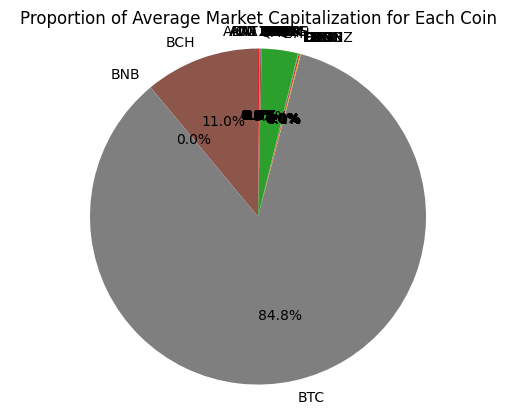

In [ ]:


# Calculate market capitalization for each row
coins['market_cap'] = coins['close'] * coins['volume']

# Calculate average market capitalization for each coin
average_market_cap = coins.groupby('symbol')['market_cap'].mean()

# Identify the coin with the highest average market capitalization
max_market_cap_coin = average_market_cap.idxmax()

# Identify the coin with the lowest average market capitalization
min_market_cap_coin = average_market_cap.idxmin()

# Print the results
print(f"The coin with the highest average market capitalization: {max_market_cap_coin}")
print(f"The coin with the lowest average market capitalization: {min_market_cap_coin}")

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(average_market_cap, labels=average_market_cap.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Proportion of Average Market Capitalization for Each Coin')
plt.show()




## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [ ]:

def plot_fancy_price_action(coins, symbol, start_date, end_date):
    coin_info = coins[(coins['symbol'] == symbol) & (coins.index >= start_date) & (coins.index <= end_date)]

    fig = plt.figure(
        figsize=(16, 6),
        facecolor='whitesmoke',
        dpi=1024
    )

    plt.suptitle('Price of the coin', fontsize=30)

    plt.title('Price of ' + symbol, fontsize=17)

    plt.plot(
        pd.to_datetime(coin_info.index), coin_info['open'],
        color='magenta',
        linestyle='-',
        alpha=1,
        linewidth=1,
        label='open'
    )

    plt.plot(
    pd.to_datetime(coin_info.index), coin_info['high'],
        color='red',
        linestyle='-',
        alpha=1,
        linewidth=1,
        label='high'
    )

    plt.plot(
    pd.to_datetime(coin_info.index), coin_info['low'],
        color='blue',
        linestyle='-',
        alpha=1,
        linewidth=1,
        label='low'
    )

    plt.plot(
    pd.to_datetime(coin_info.index), coin_info['close'],
        color='black',
        linestyle='-',
        alpha=1,
        linewidth=1,
        label='close'
    )

    plt.xlabel(
        'Date',
        fontdict=dict(family='serif', color='darkred', weight='normal', size=16)
    )
    plt.ylabel(
        'Price',
        fontdict=dict(family='monospace', color='magenta', weight='light', size=16)
    )

    plt.legend(
        loc='upper left',
        borderaxespad=2
    )

    plt.grid(True)
    plt.show()
    del fig, coin_info

Посмотрим, что получилось:

In [ ]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [ ]:
import pandas as pd

def find_most_severe_pump_and_dump(
    coins: pd.DataFrame, symbol: str, start_date: str, end_date: str
) -> dict:

    # Input validation
    if symbol not in coins['symbol'].unique():
        raise ValueError(f"Symbol '{symbol}' not found in the provided DataFrame.")

    # Filter relevant data
    days_to_check = coins[(coins['date'] >= start_date) &
                          (coins['date'] <= end_date) & (coins['symbol'] == symbol)]

    # Initialize variables
    max_pump_and_dump = 1
    pump_and_dump_day = start_date

    # Iterate over relevant data
    for index, row in days_to_check.iterrows():
        max_open_close = max(row['open'], row['close'])
        pump_and_dump_value = row['high'] / max_open_close

        # Update if a more severe pump


In [ ]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

Сравните эти значения для разных монет:

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [ ]:

def compute_roi(
    coins: pd.DataFrame, investments: dict, start_date: str, end_date: str) -> float:
    start = 0
    for i in investments.values():
        start += i
    finish = 0
    ignore_index=False
    for i in investments.keys():
        p = float(coins[coins['date'] == start_date][coins[coins['date'] == start_date]['symbol'] == i]['price'])
        print('p =', p)
        kol = investments[i]/p
        f = float(coins[coins['date'] == end_date][coins[coins['date'] == end_date]['symbol'] == i]['price'])
        print('f = ', f)
        finish += kol*f
    return (finish - start) / start

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

p = 7456.41
f =  7500.7
p = 133.91
f =  118.03


-0.035569133065275614

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

p = 129.77
f =  7625.97
p = 3.1
f =  121.89


51.28330296529592

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [ ]:
def plot_bollinger_bands(coins, symbol, window, width):
    start_date = coins['date'].min()
    end_date = coins['date'].max()
    coin = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]

    fig = plt.figure(
        figsize=(16, 9),
        facecolor='white',
        dpi=200
    )
    price = coin['price']
    mean = price.rolling(window=window).mean()
    std = price.rolling(window=window).std()

    ax = fig.add_subplot(111)
    ax.set_title('Price action for {}'.format(symbol))
    ax.fill_between(pd.to_datetime(coin['date']),  y1 = mean + std, y2 = mean - std, color='grey')
    ax.plot(pd.to_datetime(coin['date']), mean, color='green', label='MA{}'.format(window))
    ax.plot(pd.to_datetime(coin['date']), mean + std, color='red', label='MA{} + Kq{}'.format(window, width))
    ax.plot(pd.to_datetime(coin['date']), mean - std, color='orange', label='MA{} - Kq{}'.format(window, width))
    ax.plot(pd.to_datetime(coin['date']), price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')

    ax.grid(True)
    plt.show()

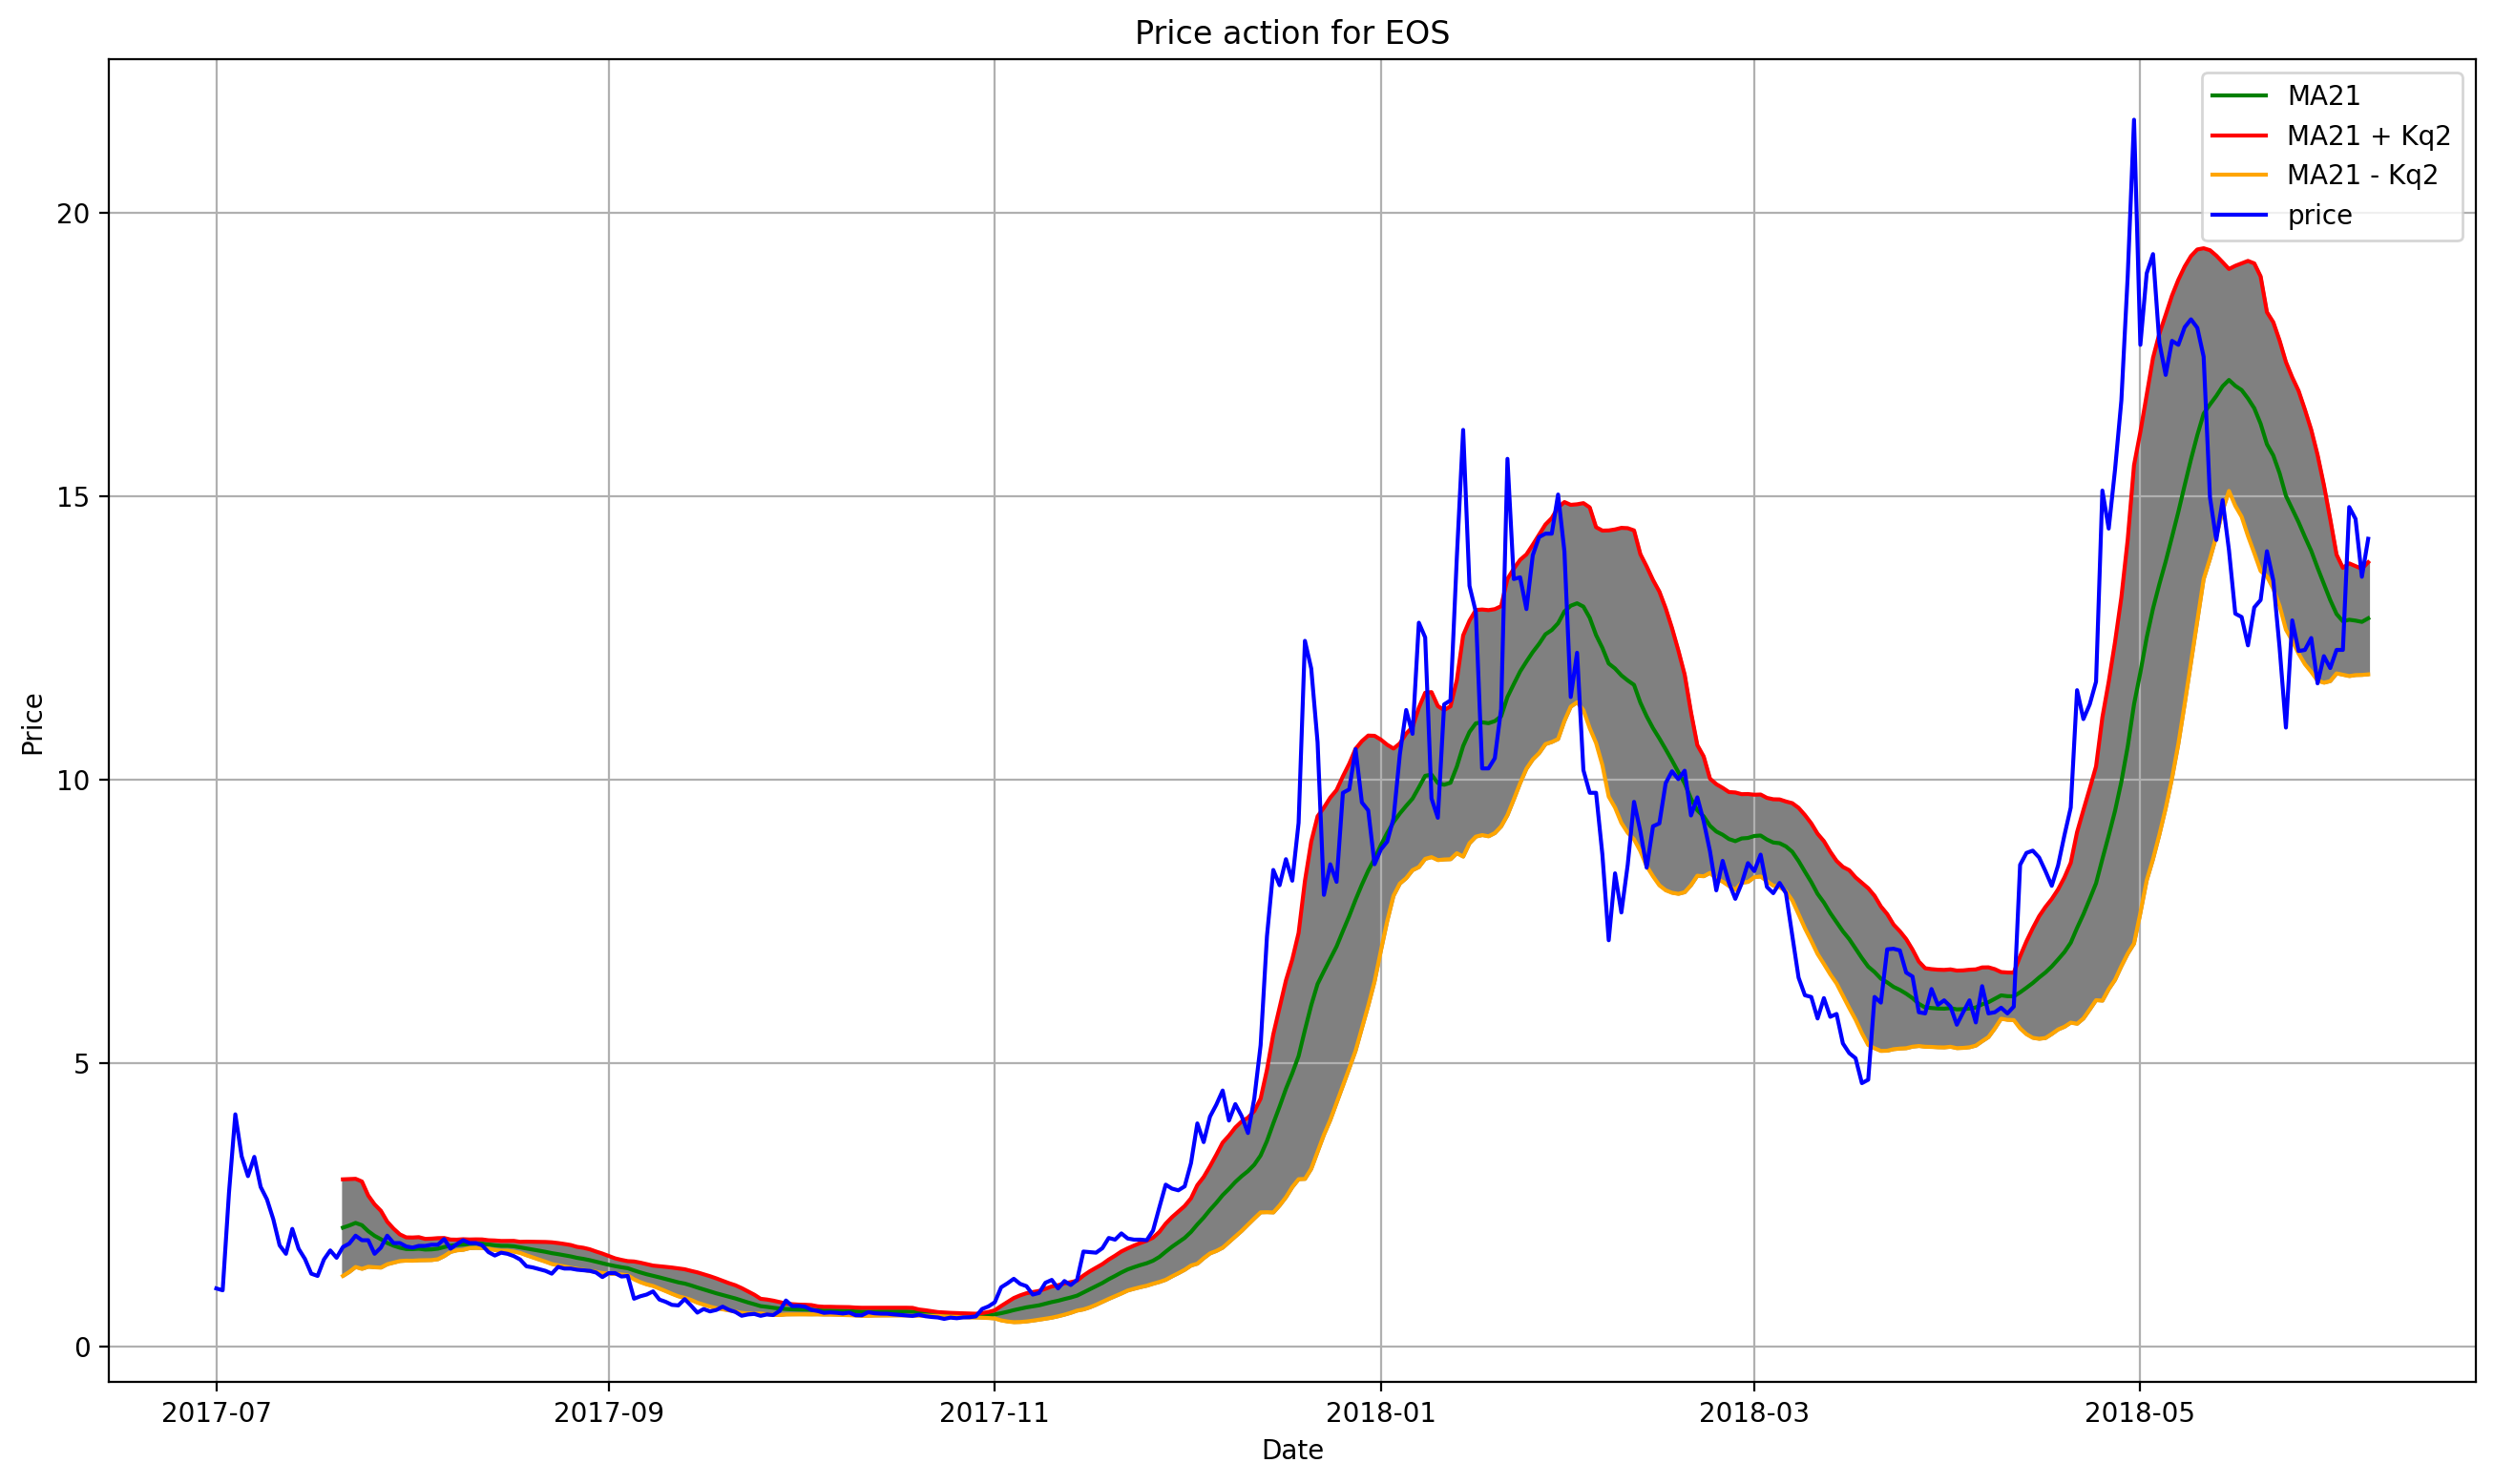

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

не выполнилось

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [ ]:
def plot_coins_capitalizations(coins, symbols, start_date):
    required = pd.DataFrame(
    data = coins[(coins['symbol'].isin(symbols)) & (coins['date'] >= start_date)]
    )
    fig = plt.figure(
        figsize=(8, 9),
        facecolor='white',
        dpi=200
    )
    plot1 = fig.add_subplot(211)

    sum_symbol_market = pd.DataFrame({'sum_market': pd.Series(required.groupby('date')['market'].agg(sum), index = required['date'])})
    plot1.plot(
        pd.to_datetime(sum_symbol_market.index), sum_symbol_market['sum_market'],
        color='red',
        linewidth=1
    )
    plot1.set_ylabel('Market')
    plot1.set_xlabel('Date')
    plot1.grid(True)

    sum_market = pd.Series(data = coins.groupby('date')['market'].agg(sum), index = coins['date'])
    required['sum_market'] = required.apply(lambda row: (sum_market[row['date']].values[0]), axis = 1)
    plot2 = fig.add_subplot(212)
    col = 0.1
    for symbol in symbols:
        symbol_data = required[required['symbol'] == symbol]
        plot2.plot(
            pd.to_datetime(symbol_data['date']), symbol_data['market']/symbol_data['sum_market'],
            color=(col, 0, 0),
            linewidth=1,
            label=symbol
        )
        col += 0.9/len(symbols)
    plot2.set_ylabel('Percentage')
    plot2.set_xlabel('Date')
    plot2.grid(True)
    plot2.legend(
        loc='lower left',
        borderaxespad=1
    )

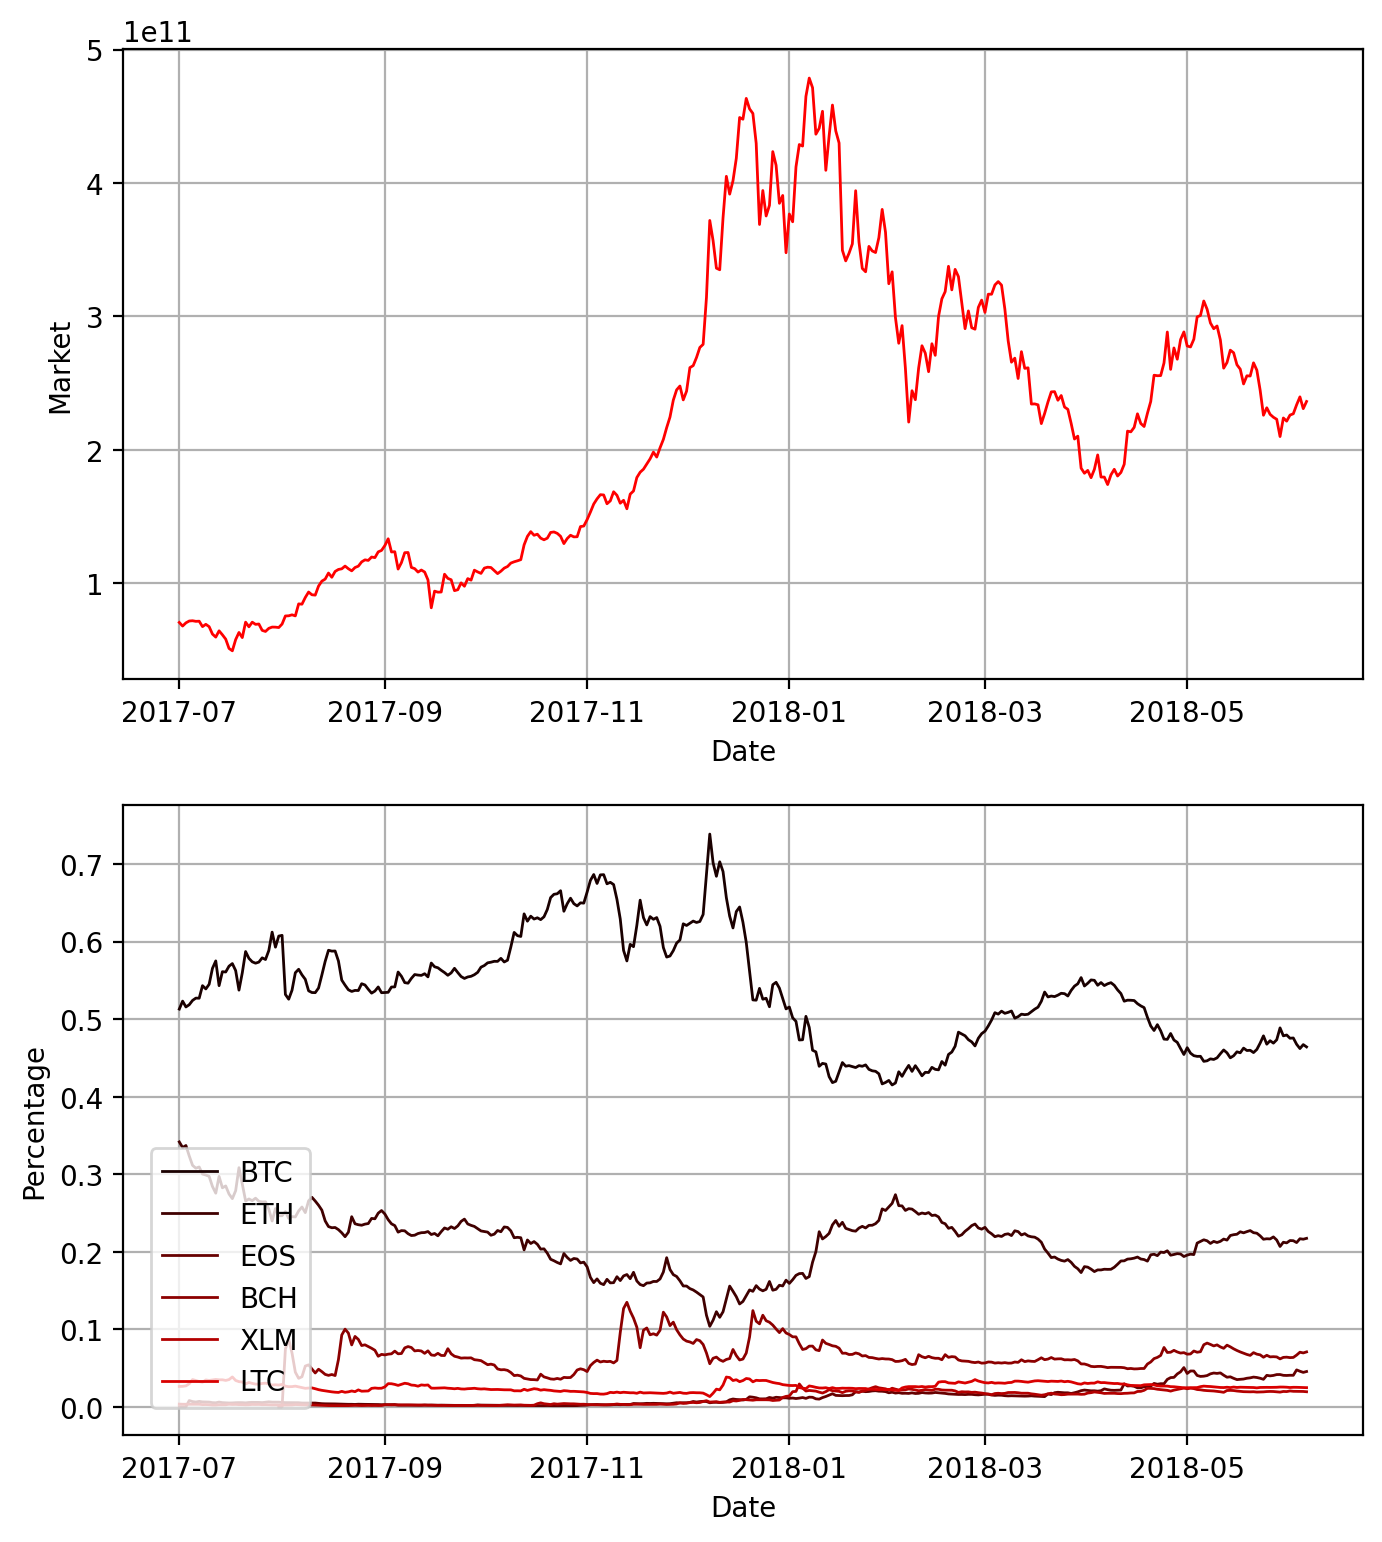

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут**

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here

SyntaxError: ignored

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

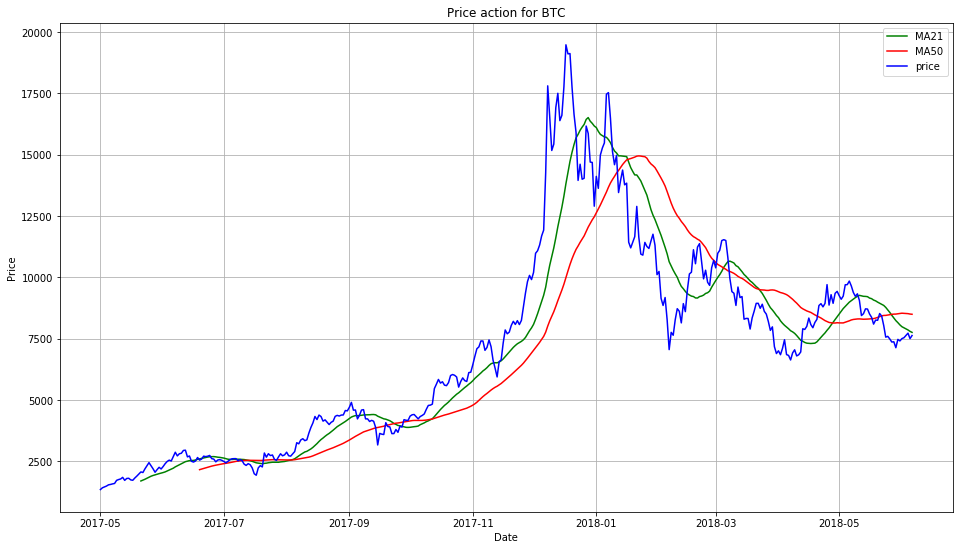

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):


    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.